# Project 2: Ames Housing Sale Price Prediction
   ---
  *By Ethan Koh, 28 April 2020*

## Overview and Problem Set

The property market is not for the ill-informed. Housing prices can be cruelly volatile as they can get affected by multiple factors. Every buyer and seller of a house seek to equip with better knowledge to achieve a reasonable transaction price. Even though it's not possible for every contributing factor to be captured by our dataset, given the housing dataset in Ames, we are going to create a __regression model predicting the sale price of houses in Ames, Iowa__. In addition, we will be able to discover what are the main factors contributing to the price.

## Datasets

These datasets are provided by General Assembly for our course Kaggle competition. The dataset was prepared by Dean De Cock taken from the Ames, Iowa Assessor’s Office, originally used for tax assessment purpose. Data set contains information used in computing assessed values for individual residential properties sold in Ames, Iowa from 2006 to 2010.

The data by Dean De Cook has 2051 observations and 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables, and 2 additional observation identifiers. However, data given by General Assembly has 81 columns, with 'Sale Condition' variable excluded, which include 22 nominal, 23 ordinal, 14 discrete, and 20 continuous variables, and 2 additional observation identifiers.

- train.csv <br /> 
- test.csv <br />


## Data Dictionary

[LINK](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

## Assumptions and Limitations
Using multi-linear regression has it's own assumptions:<br />
Firstly, the predictors and target variable have an approximate linear relationship.<br />
Secondly, residuals are independent of each other, following a Normal distribution with mean 0 and have roughly equal variances.<br />
Thirdly, the predictors are independent of each other.<br />

In addition, there are limitations to predict future prices based on a 2006-2010 old dataset that we have. Many of the predictors for sale price may no longer be significant/relevant. Example, neighbouhood or street may have expanded.

## Table of Contents
- Import Libraries<br /> 
- Load Training Dataset<br />
- Data Cleaning: Missing Data <br /> <ul>
- Left 4 predictors with missing values
- Missing values actions to take </ul>
- Exploratory Data Analysis<br /> <ul>
- Datatypes Correction</ul>
    
    


Handling missing values
Garage from the future...?
Exploratory Data Analysis
The target - SalePrice
Handling Extreme Sale Prices
Preliminary Feature Correlations
Feature Engineering
House Age
House Total Area
House Total Baths
createInteraction Helper Function
Establishing conversion dictionaries
Simple conversions
Quality * Condition = Score
Quality + Area/Count = Score
createDummies Helper Function
Creating dummy variables
Final Feature Correlations
Model Preparation
Establishing baseline model
Fitting Model
Model Evaluation
getBestModel Helper Function
Plotting Predicted Sale Price vs. Actual Sale Price
Plotting Residuals
Inferrential Statistics and Conclusions
Model Coefficients
Model Assumptions
Kaggle Submission
Sources

## Import Libraries

In [333]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score

%matplotlib inline

## Load Training Dataset

In [334]:
# There are 12 features(columns) with NA as a value with meaning
# Hence during import set defaul na as False
housing = pd.read_csv("../datasets/train.csv",index_col="Id",keep_default_na=False)

## Data Cleaning: Missing Data

In [335]:
#set option to view all columns
pd.set_option('display.max_columns', 100)
housing.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957,Unf,2,484,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [336]:
# check data shape
housing.shape

(2051, 80)

In [337]:
# replace real missing data with NaN
housing.replace('', np.nan,inplace=True)

In [338]:
# check for nulls
housing.isnull().sum()[housing.isnull().sum()>0]

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Qual           1
Bsmt Cond           1
Bsmt Exposure       4
BsmtFin Type 1      1
BsmtFin SF 1        1
BsmtFin Type 2      2
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     114
Garage Finish       1
Garage Cars         1
Garage Area         1
Garage Qual         1
Garage Cond         1
dtype: int64

In [339]:
# drop one of the identifier variable. no need to have 2 index
housing.drop('PID',axis=1,inplace=True)
housing.shape

(2051, 79)

In [340]:
# random check whether it is the same null value in some of the predictors
housing[housing['BsmtFin SF 1'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1342,20,RM,99,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [341]:
housing[housing['Total Bsmt SF'].isnull()]
# it is the same ID having many nulls. id=1342. probably is completely missing at random. 

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1342,20,RM,99,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NA,Detchd,1946,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,4,2008,ConLD,79000


In [342]:
# remove id=1342
housing.drop(1342,inplace=True)

In [343]:
# check for nulls again
housing.isnull().sum()[housing.isnull().sum()>0]

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Exposure       3
BsmtFin Type 2      1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Yr Blt     114
Garage Finish       1
Garage Cars         1
Garage Area         1
Garage Qual         1
Garage Cond         1
dtype: int64

In [344]:
# random check whether it is the same null value in some of the predictors
housing[housing['Garage Cond'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2237,70,RM,50,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,BrkTil,Gd,TA,No,ALQ,548,Unf,0,311,859,GasA,Ex,Y,SBrkr,942,886,0,1828,0,0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [345]:
housing[housing['Garage Qual'].isnull()]
# it is the same ID having many nulls. id=2237. probably is missing completely at random (MCAR). 

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2237,70,RM,50,9060,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,BrkTil,Gd,TA,No,ALQ,548,Unf,0,311,859,GasA,Ex,Y,SBrkr,942,886,0,1828,0,0,2,0,3,1,Gd,6,Typ,0,NA,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NA,MnPrv,NA,0,3,2007,WD,150909


In [346]:
# remove id=2237
housing.drop(2237,inplace=True)

In [347]:
# check for nulls again
housing.isnull().sum()[housing.isnull().sum()>0]

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Exposure       3
BsmtFin Type 2      1
Bsmt Full Bath      1
Bsmt Half Bath      1
Garage Yr Blt     113
dtype: int64

In [348]:
# check shape
housing.shape

(2049, 79)

In [349]:
# just drop those with small missing values seems most likely is completely missing at random
housing.dropna(subset=['Bsmt Exposure','BsmtFin Type 2','Bsmt Full Bath','Bsmt Half Bath'],inplace=True)

In [350]:
# check shape
housing.shape
# 5 rows dropped

(2044, 79)

In [351]:
# check for nulls again
housing.isnull().sum()[housing.isnull().sum()>0]

Lot Frontage     330
Mas Vnr Type      22
Mas Vnr Area      22
Garage Yr Blt    113
dtype: int64

### Left 4 predictors with missing values
Let's investigate further

In [352]:
housing.loc[housing['Lot Frontage'].isnull(),:]
# only that specific column have missing values. 
# other columns seems to not have missing values, suggesting not missing at random(NMAR) or missing at random(MAR).
# I believe it's merely due to lack of this information by sellers or buyers instead hence filled as Null.

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
145,20,RL,NaN,12160,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180,TA,TA,CBlock,TA,TA,No,Rec,1000,Unf,0,188,1188,GasA,Fa,Y,SBrkr,1188,0,0,1188,1,0,1,0,3,1,TA,6,Typ,0,NA,Attchd,1959,RFn,2,531,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,5,2010,COD,142000
1942,20,RL,NaN,15783,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,TA,TA,CBlock,TA,TA,No,Rec,292,Unf,0,632,924,GasA,TA,Y,SBrkr,924,0,0,924,0,0,1,0,2,1,TA,6,Typ,0,NA,Detchd,1952,Unf,1,420,TA,TA,Y,0,324,0,0,0,0,NA,MnPrv,Shed,400,6,2007,WD,112500
12,20,RL,NaN,7980,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0,TA,Gd,PConc,Gd,TA,No,ALQ,935,Unf,0,233,1168,GasA,Ex,Y,SBrkr,1187,0,0,1187,1,0,2,0,3,1,TA,6,Typ,0,NA,Attchd,1992,Fin,2,420,TA,TA,Y,483,21,0,0,0,0,NA,GdPrv,Shed,500,3,2010,WD,185000
1534,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0,TA,TA,CBlock,TA,TA,No,BLQ,606,Unf,0,336,942,GasA,Ex,Y,SBrkr,1265,673,0,1938,0,0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937,Unf,1,240,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,7,2008,WD,198000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,20,RL,NaN,7791,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,1Fam,1Story,5,8,1963,1995,Gable,CompShg,Plywood,Plywood,None,0,Gd,Gd,CBlock,TA,TA,No,ALQ,624,Unf,0,288,912,GasA,Ex,Y,SBrkr,912,0,0,912,1,0,1,0,3,1,Gd,6,Typ,0,NA,Attchd,1963,RFn,1,300,TA,TA,Y,0,0,0,0,0,0,NA,GdWo,NA,0,10,2009,WD,129000
2872,20,RL,NaN,16381,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,5,1969,1969,Gable,CompShg,Plywood,Plywood,BrkFace,312,Gd,Gd,CBlock,TA,TA,Av,Rec,1110,Unf,0,734,1844,GasA,Gd,Y,SBrkr,1844,0,0,1844,1,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1969,RFn,2,540,TA,TA,Y,0,73,216,0,0,0,NA,NA,NA,0,12,2006,WD,223000
2526,20,RL,NaN,20781,Pave,NA,IR2,Lvl,AllPub,CulDSac,Gtl,NWAmes,PosN,Norm,1Fam,1Story,7,7,1968,2003,Hip,CompShg,BrkFace,HdBoard,None,0,TA,TA,CBlock,TA,TA,No,BLQ,297,Rec,68,1203,1568,GasA,TA,Y,SBrkr,2156,0,0,2156,0,0,2,0,3,1,TA,9,Typ,1,Gd,Attchd,1968,RFn,2,508,Gd,TA,Y,0,80,0,290,0,0,NA,NA,NA,0,6,2006,WD,262500


In [353]:
# temporary drop the nulls
housing_temp = housing.dropna()
# create a temporary dataframe with just the 4 predictors of concern
housing_temp = housing_temp.loc[:,['Lot Frontage','Mas Vnr Type','Mas Vnr Area','Garage Yr Blt']]
housing_temp.head()

,Lot Frontage,Mas Vnr Type,Mas Vnr Area,Garage Yr Blt
Id,,,,
544,43,BrkFace,132,1997
153,68,None,0,1953
318,73,None,0,2007
255,82,None,0,1957
138,137,None,0,1966


In [354]:
# correct the datatype
housing_temp['Lot Frontage'] = housing_temp['Lot Frontage'].astype(int)
housing_temp['Mas Vnr Area'] = housing_temp['Mas Vnr Area'].astype(int)
housing_temp['Garage Yr Blt'] = housing_temp['Garage Yr Blt'].astype(int)
housing_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1592 entries, 544 to 10
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Lot Frontage   1592 non-null   int64 
 1   Mas Vnr Type   1592 non-null   object
 2   Mas Vnr Area   1592 non-null   int64 
 3   Garage Yr Blt  1592 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.2+ KB


In [355]:
# Explore summary statistics
housing_temp.describe()
# For Lot Frontage, the standard deviation is 1/3 of the mean. 75th percentile is low compared to the maximum 313 suggesting there are outliers 
# I think it is reasonable to use the median 69 to replace null values for Lot Frontage

# For Mas Vnr Area, it seems that majority is zero. Shall explore using boxplot below.

# For Garage Yr Blt, year range is from 1895 to 2010 with mean at 1978. Standard deviation is low at 25 years. 
# Suggest fitting the missing values with the mean

,Lot Frontage,Mas Vnr Area,Garage Yr Blt
count,1592.000000,1592.000000,1592.00000
mean,69.474246,102.198492,1978.08103
std,23.263432,179.991576,25.97887
min,21.000000,0.000000,1895.00000
25%,59.000000,0.000000,1959.00000
50%,69.000000,0.000000,1980.00000
75%,80.000000,163.250000,2003.00000
max,313.000000,1600.000000,2010.00000


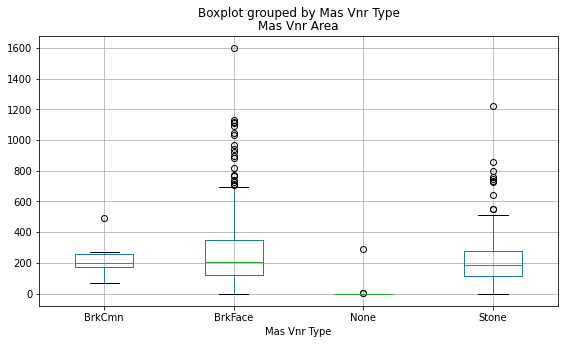

In [356]:
housing_temp.boxplot('Mas Vnr Area',by='Mas Vnr Type',figsize=(9,5));
# Those that have 'None' as Mas Vnr Type should have Mas Vnr Area as 0
# Others Mas Vnr Type have roughly similar median with more outliers from BrkFace. 
# So should fit Mas Vnr Area's missing values with their respective median

In [357]:
# Look at proportion in Mas Vnr Type
housing_temp['Mas Vnr Type'].value_counts()
# Mostly is 'None'. Suggest filling the 22 values with 'None' since it's not a lot of missing values.

None       955
BrkFace    473
Stone      156
BrkCmn       8
Name: Mas Vnr Type, dtype: int64

### Missing values actions to take:
- 'Mas Vnr Type': Filling the 22 missing values as 'None'.
- 'Lot Frontage': Fill the 330 missing values with median value 69.
- 'Mas Vnr Area': For those with 'None' for 'Mas Vnr Type', fill as 0. 
   Others fill with their respective Mas Vnr Type Median
   Since those missing at Mas Vnr Area is same as Mas Vnr Type, so will fill those as 0.
- 'Garage Yr Blt': Filling the 113 missing values with mean year 1978.

## Filling missing values

In [358]:
housing['Lot Frontage'].fillna(69, inplace=True)

In [359]:
housing['Garage Yr Blt'].fillna(1978, inplace=True)

In [360]:
housing['Mas Vnr Type'].fillna('None', inplace=True)

In [361]:
housing['Mas Vnr Area'].fillna(0, inplace=True)

In [362]:
# casual checking
housing['Mas Vnr Type'].value_counts()

None       1236
BrkFace     627
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [363]:
# check for nulls again
housing.isnull().sum()[housing.isnull().sum()>0]
# no more missing values

Series([], dtype: int64)

In [364]:
# Final number of rows and columns
housing.shape
# 2044 observations, 78 predictors, 1 target

(2044, 79)

## Exploratory Data Analysis

### Datatypes Correction

In [365]:
# convert datatype to correct ones
housing['Lot Frontage'] = housing['Lot Frontage'].astype(int)
housing['Mas Vnr Area'] = housing['Mas Vnr Area'].astype(int)
housing['Garage Yr Blt'] = housing['Garage Yr Blt'].astype(int)

In [366]:
# Look at data to check datatype
housing.head(10)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,60,RL,69,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
544,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
153,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
318,60,RL,73,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
255,50,RL,82,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957,Unf,2,484,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500
138,20,RL,137,16492,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0,Gd,TA,CBlock,TA,TA,No,ALQ,247,Rec,713,557,1517,GasA,Ex,Y,SBrkr,1888,0,0,1888,0,0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966,Fin,2,578,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2010,WD,190000
2827,180,RM,35,3675,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,2,0,2,1,TA,5,Typ,0,NA,Basment,2005,Fin,2,525,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,6,2006,New,140000
145,20,RL,69,12160,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180,TA,TA,CBlock,TA,TA,No,Rec,1000,Unf,0,188,1188,GasA,Fa,Y,SBrkr,1188,0,0,1188,1,0,1,0,3,1,TA,6,Typ,0,NA,Attchd,1959,RFn,2,531,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,5,2010,COD,142000
1942,20,RL,69,15783,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,TA,TA,CBlock,TA,TA,No,Rec,292,Unf,0,632,924,GasA,TA,Y,SBrkr,924,0,0,924,0,0,1,0,2,1,TA,6,Typ,0,NA,Detchd,1952,Unf,1,420,TA,TA,Y,0,324,0,0,0,0,NA,MnPrv,Shed,400,6,2007,WD,112500


In [367]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 109 to 10
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MS SubClass      2044 non-null   int64 
 1   MS Zoning        2044 non-null   object
 2   Lot Frontage     2044 non-null   int64 
 3   Lot Area         2044 non-null   int64 
 4   Street           2044 non-null   object
 5   Alley            2044 non-null   object
 6   Lot Shape        2044 non-null   object
 7   Land Contour     2044 non-null   object
 8   Utilities        2044 non-null   object
 9   Lot Config       2044 non-null   object
 10  Land Slope       2044 non-null   object
 11  Neighborhood     2044 non-null   object
 12  Condition 1      2044 non-null   object
 13  Condition 2      2044 non-null   object
 14  Bldg Type        2044 non-null   object
 15  House Style      2044 non-null   object
 16  Overall Qual     2044 non-null   int64 
 17  Overall Cond     2044 non-null   

After investigating, the following variables are wrongly classified:
- BsmtFin SF 1
- BsmtFin SF 2
- Bsmt Unf SF    
- Total Bsmt SF 
- Bsmt Full Bath   
- Bsmt Half Bath
- Garage Cars   
- Garage Area

All of these should be integer instead of float. So let's correct them.

In [368]:
# checked the values within these variables for typos
# Won't display the result
# np.unique(housing['Garage Area'])

In [369]:
wrong_col = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath','Garage Cars','Garage Area']
# convert the above mentioned columns to integer
housing[wrong_col] = housing[wrong_col].astype(int)

In [370]:
# check datatype corrected
housing.loc[:,wrong_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 109 to 10
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   BsmtFin SF 1    2044 non-null   int64
 1   BsmtFin SF 2    2044 non-null   int64
 2   Bsmt Unf SF     2044 non-null   int64
 3   Total Bsmt SF   2044 non-null   int64
 4   Bsmt Full Bath  2044 non-null   int64
 5   Bsmt Half Bath  2044 non-null   int64
 6   Garage Cars     2044 non-null   int64
 7   Garage Area     2044 non-null   int64
dtypes: int64(8)
memory usage: 143.7 KB


### Remove outliers

Remmoving abnormal sales will improve prediction for sale prices. The abnormal sales can arise from exceptional high value sales or unusually areas size. So I want to remove at least certain extreme outliers.
Taking a look at some Areas vs Sale prices:
- Lot Area
- Garage Area
- Pool Area
- Gr Liv Area
- 1st Flr SF
- Low Qual Fin SF
- Sale price

In [371]:
# Variables to investigate
investigate_col = ['Lot Area','Garage Area','Pool Area','Gr Liv Area','1st Flr SF','Low Qual Fin SF']

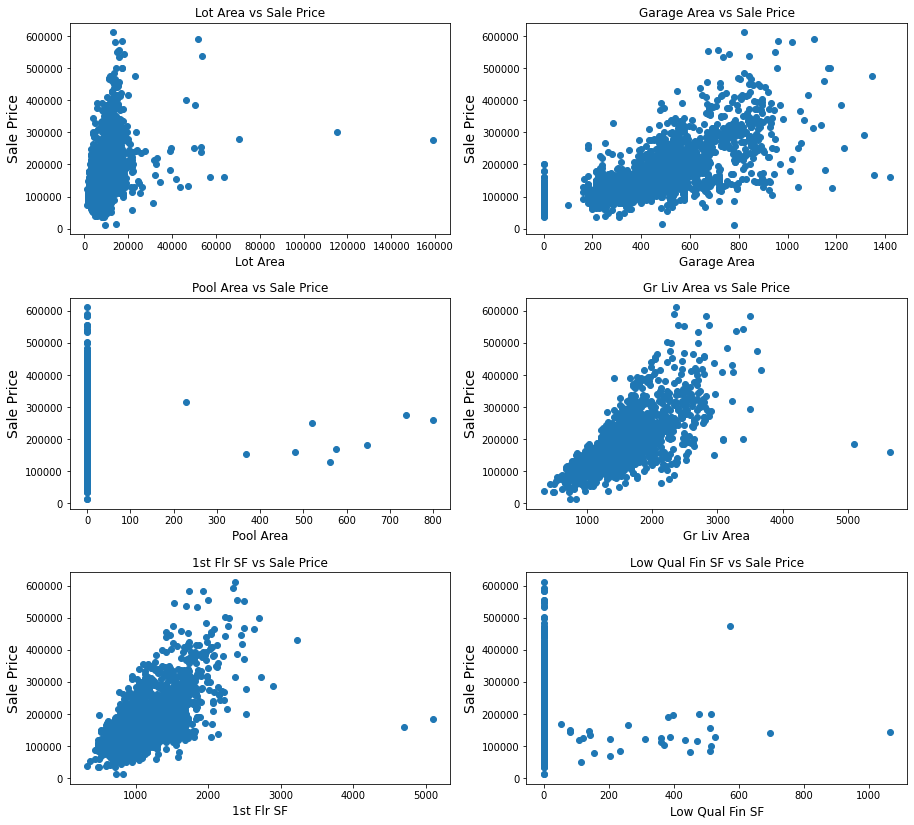

In [372]:
# Scatterplot of variables of interest

#Alternative simple plot
#fig, axes = plt.subplots(3,2, figsize=(14,12))
#for i in range(6):
#    housing.plot(kind='scatter',x=investigate_col[i],y='SalePrice',ax=axes.flatten()[i])

fig, axes = plt.subplots(3,2, figsize=(15,14))
for i in range(6):
    axes.flatten()[i].scatter(housing[investigate_col[i]],housing['SalePrice'])
    axes.flatten()[i].set_xlabel(investigate_col[i],fontsize=12)
    axes.flatten()[i].set_ylabel('Sale Price',fontsize=14)
    axes.flatten()[i].set_title(str(investigate_col[i])+" vs Sale Price")
    
plt.subplots_adjust(hspace=0.3)

Notice 2 obvious outliers for '1st Flr SF', 'Gr Liv Area' and 'Lot Area'. 
Notice 3 obvious outliers for 'Low Qual Fin SF'.
Notice only 9 non-zero 'Pool Area' out of 2044 observations. Do not forsee it will be a main predictor.

'1st Fir SF', 'Gr Liv Area' and 'Garage Area' have some linear relatioship with 'SalePrice', suggesting they could be important predictors.

In [228]:
# Drop 2 observations with unusually high 'Gr Liv Area'
housing.drop(housing[housing['Gr Liv Area']>4000].index,axis=0,inplace=True)

In [229]:
# find the 3 largest 'Low Qual Fin SF'
housing[housing['Low Qual Fin SF']>550]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
661,50,RL,60,10410,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,4,5,1915,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1313,1313,GasA,TA,Y,SBrkr,1313,0,1064,2377,0,0,2,0,3,1,Gd,8,Min2,1,TA,Detchd,1954,Unf,2,528,TA,TA,Y,0,0,432,0,0,0,NA,NA,NA,0,6,2009,WD,142900
2667,75,RM,90,22950,Pave,NA,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,NA,GdPrv,NA,0,6,2006,WD,475000
1362,50,RM,60,6876,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,6,1938,1958,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1272,1272,GasA,TA,Y,SBrkr,1272,0,697,1969,0,0,2,0,4,1,TA,9,Min1,1,Gd,Detchd,1938,Unf,2,400,TA,TA,Y,0,34,0,0,0,0,NA,NA,NA,0,11,2008,COD,141000


In [230]:
# Drop 3 observations with unusually high 'Low Qual Fin SF'
housing.drop(housing[housing['Low Qual Fin SF']>550].index,axis=0,inplace=True)

In [231]:
# check if Lot Area already dropped 
housing[housing['Lot Area']>100_000] # Not yet

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2116,50,RL,69,159000,Pave,NA,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NA,NA,Shed,500,6,2007,WD,277000
2072,20,RL,69,115149,Pave,NA,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,NA,NA,NA,0,6,2007,WD,302000


In [233]:
# Drop 2 observations with unusually high 'Lot Area'
housing.drop(housing[housing['Lot Area']>100_000].index,axis=0,inplace=True)

In [234]:
# check if 1st Flr SF already dropped 
housing[housing['1st Flr SF']>4000] # Dropped already

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


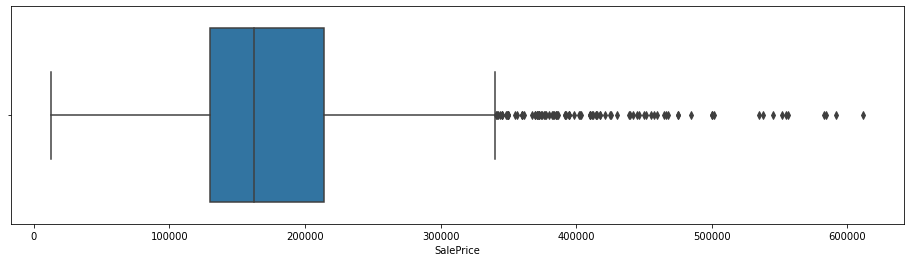

In [374]:
# Boxplot of Sale Price
# no exceptionally big outliers to remove
plt.figure(figsize=(16,4))
sns.boxplot(housing['SalePrice']);

### Correlation

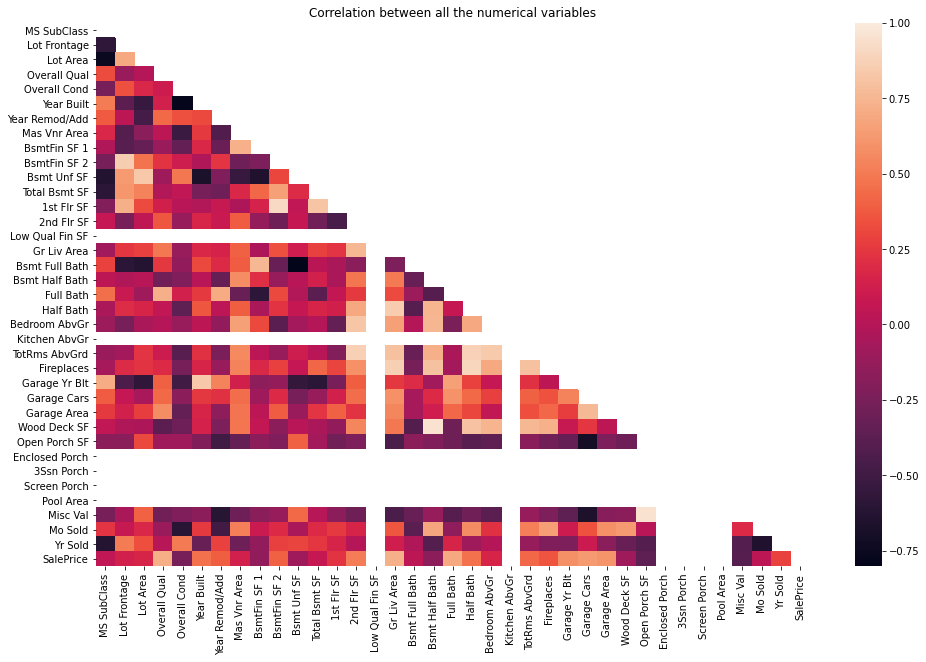

In [395]:
# Establish size of figure.
plt.figure(figsize=(16,10))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(housing.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(housing[1:10].corr(), mask=mask).set(title="Correlation between all the numerical variables");

There are a few extremly highly correlated variables such as:
- Screen Porch

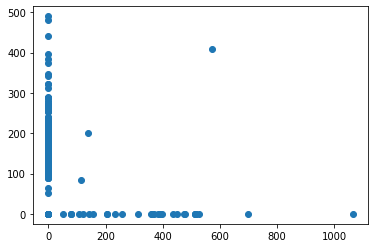

In [383]:
plt.scatter(housing['Low Qual Fin SF'],housing['Screen Porch'])

### Feature selection

After investigating the variables, I have selected these few that I suspect may be the main predictors:
- MS SubClass
- MS Zoning
- Utilities
- Neighborhood
- House Style
- Overall Qual
- Overall Cond
- BsmtFin Type 2
- KitchenQual
- Full Bath
- Garage Type
- Pool QC
- Sale Type
- Sale Condition

In [30]:
housing.loc[:,['Yr Sold','SalePrice']]

,Yr Sold,SalePrice
Id,,
109,2010,130500
544,2009,220000
153,2010,109000
318,2010,174000
255,2010,138500
...,...,...
1587,2008,298751
785,2009,82500
916,2009,177000


In [31]:
housing_test = pd.read_csv("../datasets/test.csv",index_col="Id",keep_default_na=False)

In [32]:
housing_test.shape

(879, 79)

In [33]:
X = housing.loc[:,['Yr Sold','Lot Area']]
X_test = housing_test.loc[:,['Yr Sold','Lot Area']]

In [34]:
y = housing.loc[:,'SalePrice']

In [35]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
predictions = lr.predict(X_test)

In [37]:
predictions.shape

(879,)

In [38]:
predictions = pd.DataFrame(predictions)

In [39]:
X_test.shape

(879, 2)

In [40]:
X_test.head()

,Yr Sold,Lot Area
Id,,
2658,2006,9142
2718,2006,9662
2414,2006,17104
1989,2007,8520
625,2009,9500


In [41]:
predictions.head()

,0
0,179028.307797
1,180842.826312
2,206811.377821
3,176410.164678
4,178934.434546


In [42]:
X_test['SalePrice'] = predictions

In [43]:
X_test.head()

,Yr Sold,Lot Area,SalePrice
Id,,,
2658,2006,9142,NaN
2718,2006,9662,NaN
2414,2006,17104,NaN
1989,2007,8520,NaN
625,2009,9500,167169.02898


In [44]:
X_test.shape

(879, 3)

In [45]:
submission = X_test.loc[:,['SalePrice']]

In [46]:
submission['SalePrice'] = y.mean()

In [47]:
submission.head()

,SalePrice
Id,
2658,181394.148728
2718,181394.148728
2414,181394.148728
1989,181394.148728
625,181394.148728


In [48]:
submission.shape

(879, 1)

In [49]:
submission.to_csv('submission_test.csv')

In [171]:

pd.set_option('display.max_rows', 100)